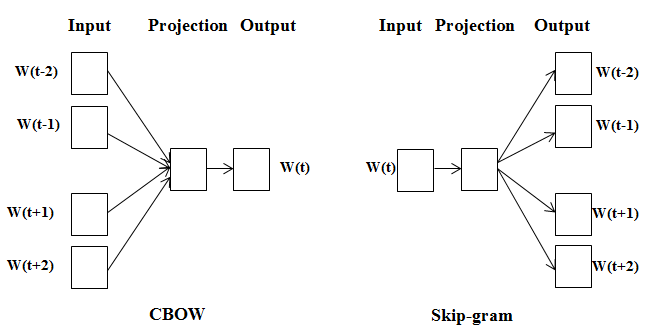

In [84]:
from collections import defaultdict, Counter

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from imblearn.combine import SMOTETomek
from nltk.corpus import stopwords
from nltk.tag import pos_tag

from gensim.models.word2vec import KeyedVectors
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

import re
import string
import numpy as np
import pandas as pd
import scipy.sparse as scs
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection._split import StratifiedKFold

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
df = pd.read_csv('/content/train.csv')

In [40]:
df.head()

,id,lemmatized,modified_sentiment
0,0,мы быть готовый к действие сразу после ...,0.0
1,1,в цель повышение показатель раскрываемость...,0.0
2,2,"в машзаль устанавливать 6 гидроагрегат , м...",0.0
3,3,16 ноябрь начинаться следующий этап немец...,-1.0
4,4,боестолкновение зафиксировать к восток от ...,0.0


In [41]:
sentences = [[t for t in text.split() if t not in stopwords.words('russian') and t not in string.punctuation]
             for text in df['lemmatized'].tolist()]

In [42]:
full_sentences = [text.split() for text in df['lemmatized'].tolist()]

In [43]:
sentences[2]

['машзаль',
 'устанавливать',
 '6',
 'гидроагрегат',
 'мощность',
 'который',
 'генераторный',
 'режим',
 'составлять',
 '1200',
 'мвт',
 'насосный',
 'режим',
 'перекачка',
 'вода',
 'нижний',
 'водоем',
 'верхний',
 'потребляться',
 '1320',
 'мвт',
 'выходить',
 'электростанция',
 'потреблять',
 'вырабатывать',
 'объяснять',
 'краткий',
 'брифинг',
 'гидроаккумулирующий',
 'электростанция',
 'являться',
 'уникальный',
 'гидроэнергетический',
 'сооружение',
 'посредством',
 'который',
 'удаваться',
 'аккумулировать',
 'запасать',
 'электрический',
 'энергия',
 'возвращать',
 'энергосистема',
 'мера',
 'необходимость',
 'час',
 'энергосистема',
 'избыток',
 'электрический',
 'энергия',
 'преимущественно',
 'ночь',
 '),',
 'гидроагрегат',
 'гаэс',
 'работать',
 'качество',
 'насос',
 'потреблять',
 'дешевый',
 'избыточный',
 'электроэнергия',
 'перекачивать',
 'вода',
 'нижний',
 'бассейн',
 'верхний',
 'аккумулировать',
 'бассейн',
 'высота',
 'несколько',
 'десяток',
 'сотня',
 'метр'

In [44]:
sentences[10]

['суббота',
 'утро',
 'представитель',
 'спецподразделение',
 'мвд',
 'беркут',
 'разгонять',
 'сторонник',
 'украинский',
 'евроинтеграция',
 'центр',
 'киев',
 'время',
 'разгон',
 'задерживать',
 '35',
 'человек',
 'составлять',
 'административный',
 'протокол',
 'отпускать',
 'данные',
 'медик',
 'пострадать',
 '35',
 'человек',
 'семь',
 'сей',
 'пора',
 'больница',
 'министр',
 'внутренний',
 'дело',
 'украина',
 'виталий',
 'захарченко',
 'приносить',
 'извинение',
 'чрезмерный',
 'применение',
 'сила',
 'отношение',
 'сторонник',
 'евроинтеграция',
 'украина',
 'время',
 'акция',
 'центр',
 'киев',
 'хотеть',
 'извиняться',
 'вместе',
 'член',
 'коллегия',
 'чрезмерный',
 'применение',
 'сила',
 'ночь',
 '30',
 'ноябрь',
 'майдан',
 'незалежность',
 'сказать',
 'захарченко',
 'отмечать',
 'категорический',
 'противник',
 'применение',
 'сила',
 'именно',
 'позиция',
 'доводить',
 'подчиненный',
 'передавать',
 'унн',
 'захарченко',
 'отстранять',
 'исполнение',
 'обязанность',


Рассмотрим пример того, как можно обучить Word2Vec

In [45]:
from gensim.models import Word2Vec

CBOW-подход

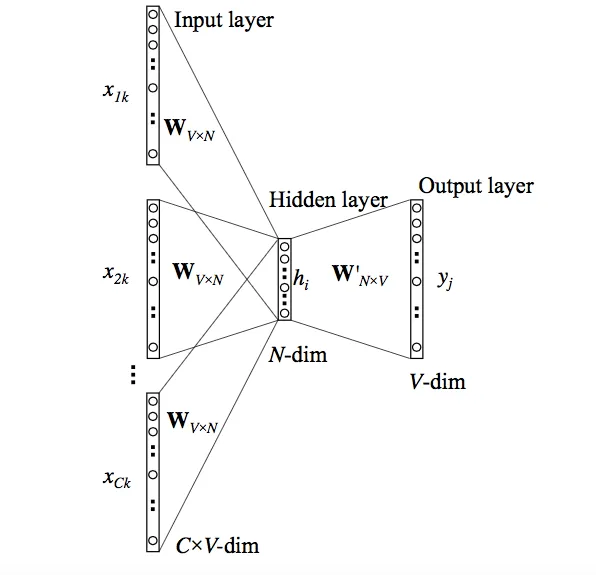

In [95]:
# train model
model = Word2Vec([sentences[2], sentences[10]], min_count=1, sg=0)

In [96]:
# summarize the loaded model
print(model)

Word2Vec<vocab=167, vector_size=100, alpha=0.025>


In [97]:
words = list(model.wv.key_to_index)
print(words)

['гидроагрегат', 'составлять', 'вода', 'гаэс', 'применение', 'захарченко', 'электрический', 'энергия', 'энергосистема', 'час', 'сила', 'киев', 'работать', 'человек', 'центр', 'чрезмерный', 'несколько', 'аккумулировать', 'украина', 'время', 'сторонник', 'бассейн', 'качество', 'пуск', '35', 'преимущественно', 'гидроэнергетический', 'ночь', 'сотня', 'евроинтеграция', '30', 'верхний', 'мощность', 'который', 'режим', 'генератор', 'нижний', 'потреблять', 'электростанция', 'мвт', 'метр', 'избыточный', 'система', 'учитывать', 'высокий', 'маневренность', 'оборудование', 'объединять', 'перекачивать', 'электроэнергия', 'поступать', 'дешевый', 'падать', 'превращать', 'высота', 'вечерний', 'утренний', 'генерировать', 'дефицит', 'образовываться', 'десяток', '15.00', 'мера', 'насос', 'объяснять', 'устанавливать', '6', 'генераторный', '1200', 'насосный', 'перекачка', 'водоем', 'потребляться', '1320', 'выходить', 'вырабатывать', 'краткий', '),', 'брифинг', 'гидроаккумулирующий', 'являться', 'уникальный

Нарисуем пространство для некоторых слов

In [98]:
pca = PCA(n_components=2)
result = pca.fit_transform(model.wv.vectors)

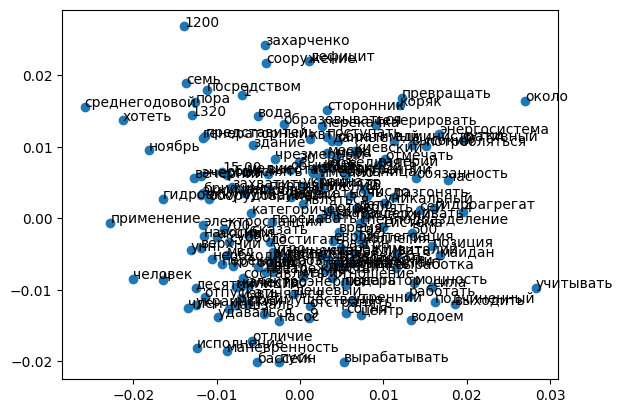

In [99]:
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
 pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

Skip-gram подход

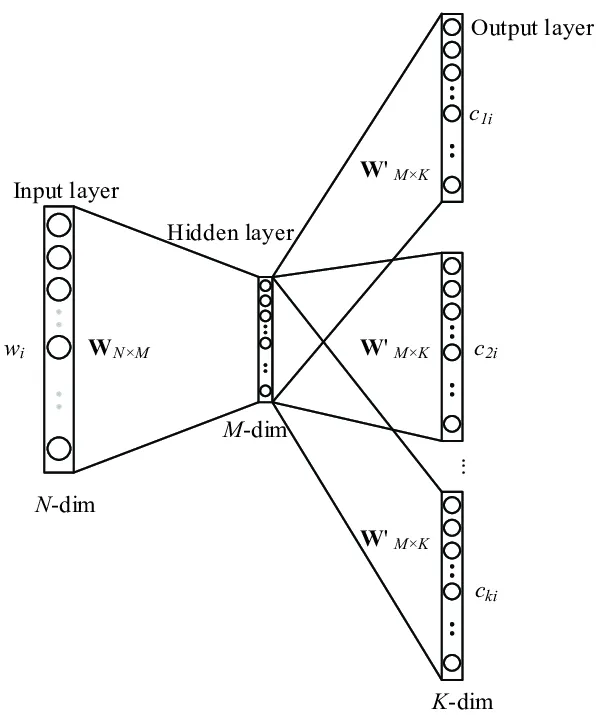

In [100]:
# train model
model = Word2Vec([sentences[2], sentences[10]], min_count=1, sg=1)

In [101]:
print(model)

Word2Vec<vocab=167, vector_size=100, alpha=0.025>


Обучим большую модель

In [108]:
# train big model
big_model = Word2Vec(sentences, min_count=1, sg=1)

In [109]:
print(big_model)

Word2Vec<vocab=70948, vector_size=100, alpha=0.025>


In [110]:
# pca = PCA(n_components=2)
result_big = pca.transform(big_model.wv.vectors)

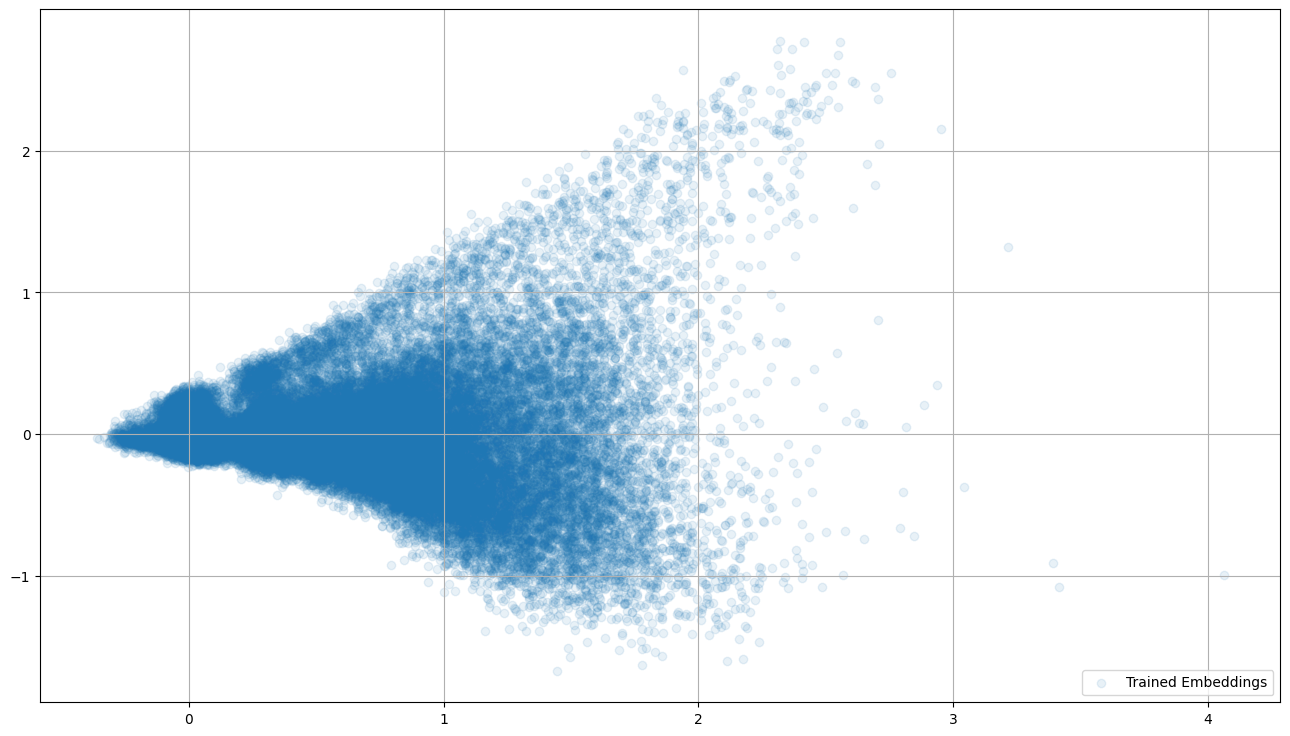

In [111]:
pyplot.figure(figsize=(16, 9))
pyplot.scatter(result_big[:, 0], result_big[:, 1], alpha=0.1, label='Trained Embeddings')
words = [] # list(model.wv.key_to_index)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result_big[i, 0], result_big[i, 1]))
pyplot.legend(loc=4)
pyplot.grid(True)
pyplot.show()

Примеры визуализации эмбеддинов с помощью t_SNE

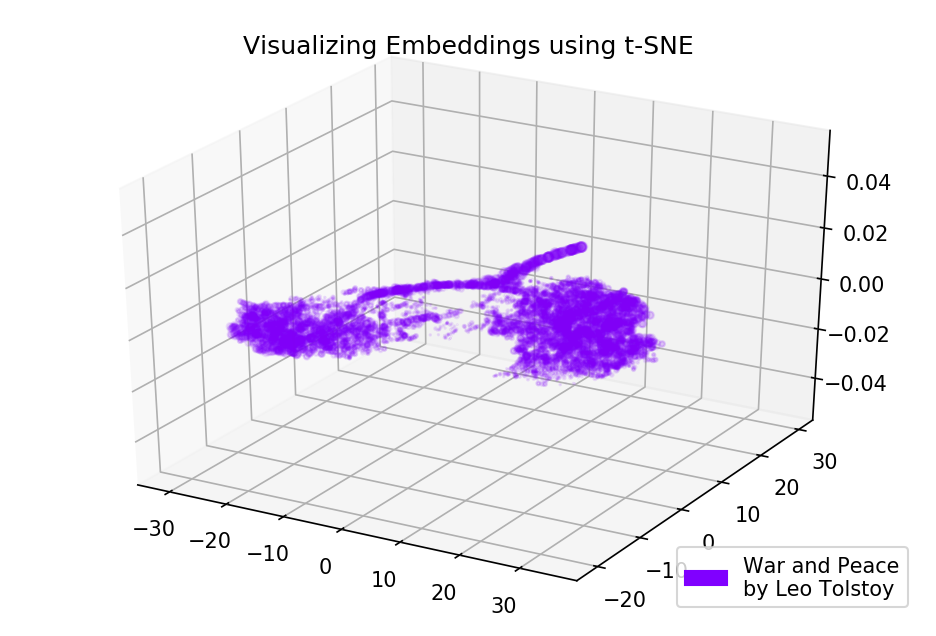

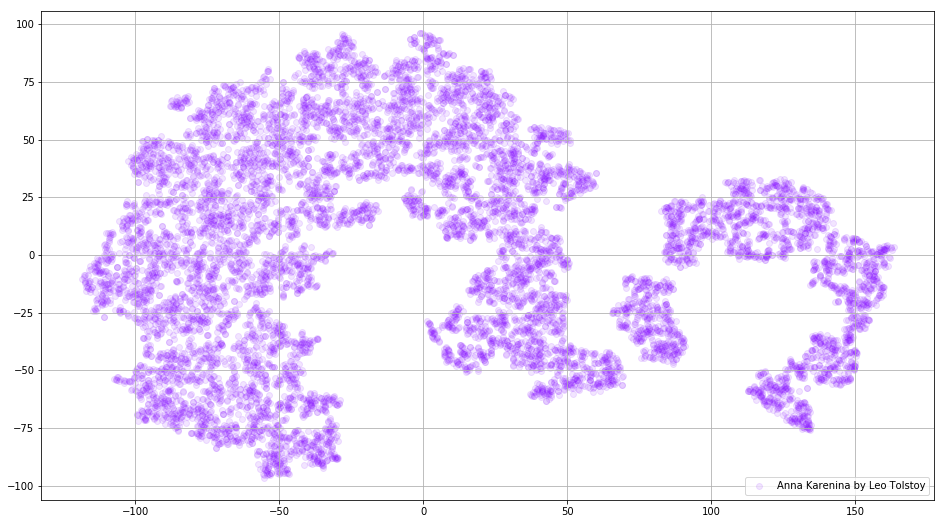

Статья с этими же картинками: https://habr.com/ru/companies/vk/articles/449984/

Веса полученных векторов можно добавлять умножать на IDF слов из TfIdf-модели

In [57]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.all_stopwords = self.get_russian_stopwords() + \
            self.get_russian_alphabet() + self.get_english_alphabet() + \
            self.get_punctuation()
        self.digits_regexp = re.compile('(\d)+')
        self.dim = word2vec.vector_size
        self.tfidf = TfidfVectorizer(tokenizer=self.tokenize,
                                     stop_words=self.all_stopwords,
                                     analyzer=lambda x: x, max_df=.85)
        self.word2weight = None

    
    @staticmethod
    def get_punctuation():
        return ") ( , ; : ? - _ * [ ] } { \" ' > < ! . * # \` / \\ | & ^ % $ @ ~ ± ... = +" \
               "0 1 2 3 4 5 6 7 8 9".split()

    @staticmethod
    def get_russian_alphabet():
        return "А Б В Г Д Е Ё Ж З И Й К Л М Н О П Р С Т У Ф Х Ц Ч Ш Щ Ъ Ы Ь Э Ю Я " \
               "а б в г д е ё ж з и й к л м н о п р с т у ф х ц ч ш щ ъ ы ь э ю я".split()

    @staticmethod
    def get_english_alphabet():
        return "A B C D E F G H I J K L M N O P Q R S T U V W X Y Z " \
               "a b c d e f g h i j k l m n o p q r s t u v w x y z".split()

    @staticmethod
    def get_russian_stopwords():
        return [word for word in stopwords.words('russian')
                if word not in ['не', 'нет', 'ни', 'хорошо', 'плохо', 'хороший', 'плохой',
                                'лучше', 'хуже', 'можно', 'нельзя',
                                'никому', 'никогда', 'нигде', 'ничего', 'ничем',
                                'некому', 'накогда', 'негде', 'нечего', 'нечем']]

    def tokenize(self, text):
        tokens = [t.lower() for t in text.split() if t.isalpha() and t not in self.all_stopwords
                  and len(t) > 1]

        return tokens

    def fit(self, X, y=None):
        self.tfidf.fit_transform(X)

        max_idf = max(self.tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            {w: self.tfidf.idf_[i] for w, i in self.tfidf.vocabulary_.items()}
        )

        return self

    def transform(self, X, y=None):
        return scs.csc_matrix(np.array([
            np.mean([self.word2vec[w] * self.word2weight[w]
                     for w in self.tokenize(words)
                     if not self.digits_regexp.match(w)
                     and w not in self.tfidf.stop_words
                     and len(w) > 1
                     and w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ]))

    def fit_transform(self, X, y=None):
        return self.fit(X).transform(X)

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
w2v_fpath = "/content/drive/My Drive/all.norm-sz100-w10-cb0-it1-min100.w2v"
w2v = KeyedVectors.load_word2vec_format(w2v_fpath, binary=True, unicode_errors='ignore')

In [81]:
print(w2v)

KeyedVectors<vector_size=100, 1239965 keys>


In [116]:
w2v.most_similar('дерево')

/usr/local/lib/python3.9/dist-packages/gensim/models/keyedvectors.py:849: RuntimeWarning: invalid value encountered in true_divide
  dists = dot(self.vectors[clip_start:clip_end], mean) / self.norms[clip_start:clip_end]


[('дерево\xa0—', 0.8678081631660461),
 ('деревце', 0.8677246570587158),
 ('деревцо', 0.8552745580673218),
 ('буковое', 0.8502448201179504),
 ('дерево,\xa0—', 0.8466764092445374),
 ('дерево…', 0.8452416062355042),
 ('срубленное', 0.8443729281425476),
 ('росшее', 0.8330211639404297),
 ('спиленное', 0.826280951499939),
 ('развесистое', 0.8261987566947937)]

In [117]:
w2v.similarity('король', 'королева')

0.753403

In [113]:
pca = PCA(n_components=2)
result_w2v = pca.fit_transform(w2v.vectors)

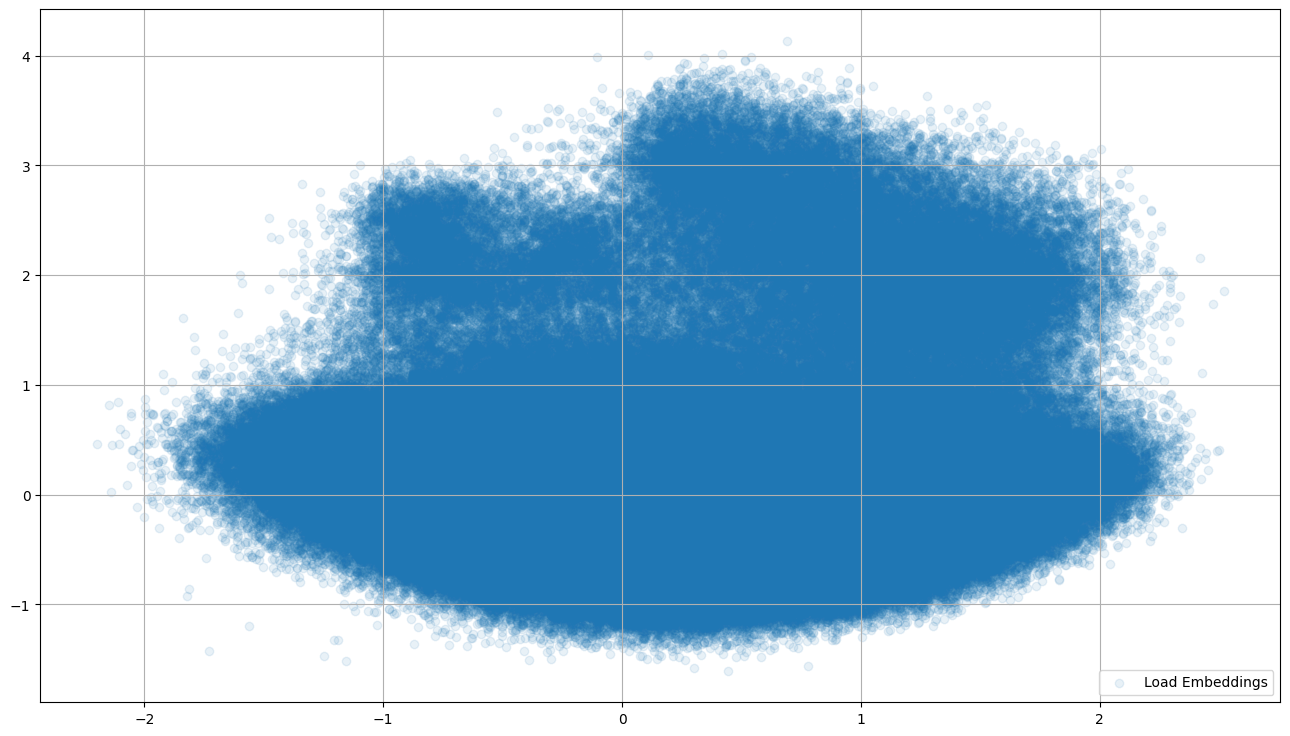

In [114]:
pyplot.figure(figsize=(16, 9))
pyplot.scatter(result_w2v[:, 0], result_w2v[:, 1], alpha=0.1, label='Load Embeddings')
words = [] # list(model.wv.key_to_index)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result_w2v[i, 0], result_w2v[i, 1]))
pyplot.legend(loc=4)
pyplot.grid(True)
pyplot.show()

In [79]:
vectorizer = MeanEmbeddingVectorizer(w2v)
X_train = vectorizer.fit_transform(df['lemmatized'])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:563: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [80]:
X_train

<13151x100 sparse matrix of type '<class 'numpy.float64'>'
	with 1315000 stored elements in Compressed Sparse Column format>

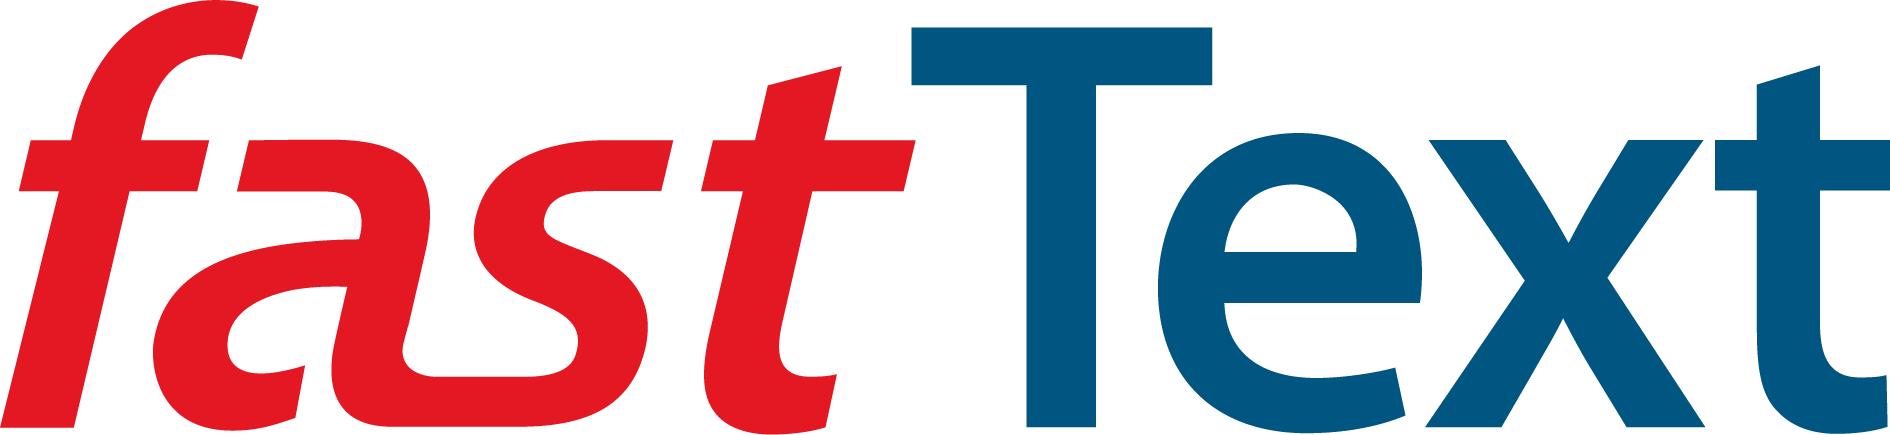

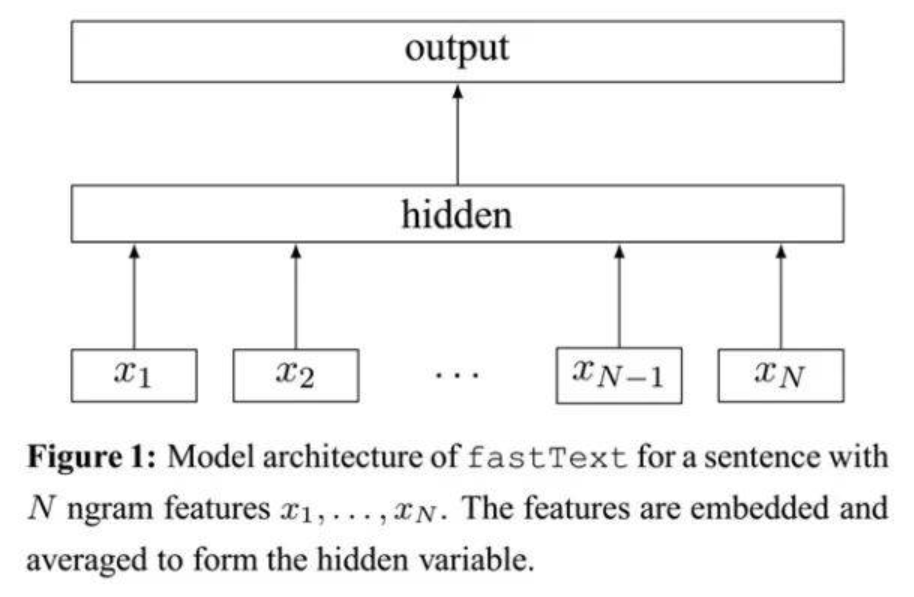

## ELMo

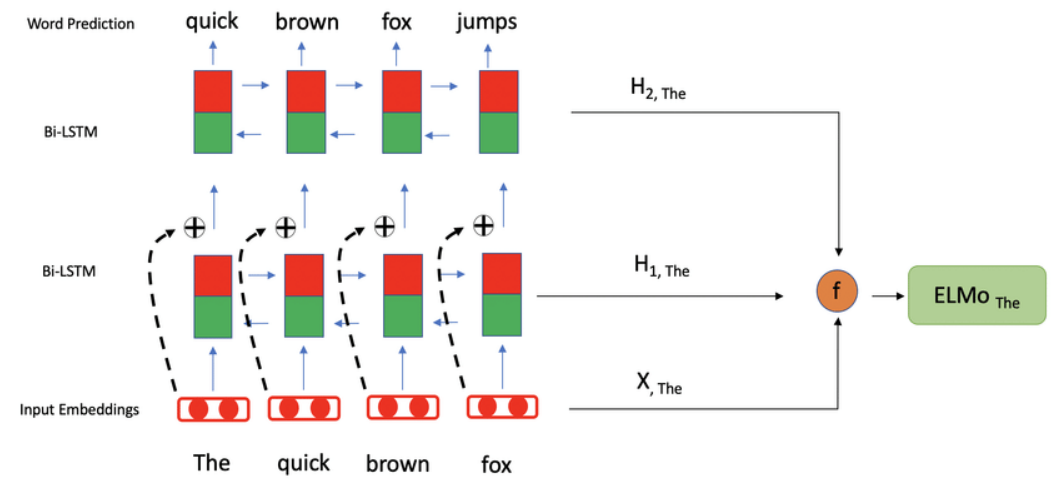

#### Практика

Реализуйте простой векторизатор слов в PyTorch

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [ ]:
CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right

vocab = set([t for sent in full_sentences for t in sent])
vocab_size = len(vocab)

In [ ]:
word_to_ix = {word: i for i, word in enumerate(vocab)}

In [ ]:
data = []

for raw_text in full_sentences:
    for i in range(CONTEXT_SIZE, len(raw_text) - CONTEXT_SIZE):
        context = (
            [raw_text[i - j - 1] for j in range(CONTEXT_SIZE)]
            + [raw_text[i + j + 1] for j in range(CONTEXT_SIZE)]
        )
        target = raw_text[i]
        data.append((context, target))

In [ ]:
print(data[:5])

In [ ]:
class CBOW(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size):
        # TODO
        # В простом случае: nn.Embeddings, nn.ReLU, 2 слоя nn.Linear

    def forward(self, inputs):
        # TODO

In [ ]:
def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    return torch.tensor(idxs, dtype=torch.long)

make_context_vector(data[0][0], word_to_ix)  # example

In [ ]:
model = CBOW(vocab_size, embedding_dim)
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
losses = []
loss_function = nn.NLLLoss()

for epoch in range(100):
    total_loss = 0
    for context, target in data:
        context_vector = make_context_vector(context, word_to_idx)
        
        model.zero_grad()
        
        nll_prob = model(context_vector)
        loss = loss_function(nll_prob, Variable(torch.tensor([word_to_idx[target]])))
        
        loss.backward()
        optimizer.step() 
        
        total_loss += loss.item()
        
    losses.append(total_loss)

print(losses)

In [ ]:
# Let's see if our CBOW model works or not

context = ['в', 'цель', 'показатель', 'раскрываемость']
context_vector = make_context_vector(context, word_to_idx)
a = model(context_vector).data.numpy()
print('Raw text: {}\n'.format(' '.join(raw_text)))
print('Test Context: {}\n'.format(context))
max_idx = np.argmax(a)
print('Prediction: {}'.format(idx_to_word[max_idx]))